# Universidade de Fortaleza
PPGIA – Introdução a estatística aplicada a ciência dos dados

Elaborado por Prof. Elizabeth S. Furtado em colaboração prof. Furlan Duarte

Alunos:
*   Marcus Vinicius Barbosa Nunes de Miranda 2016706

*   Agenor Bezerra Nunes Junior 2016402

*   Ricardo Gleidson de Vasconcelos 2016409



Trabalho Final de estatística (5 ptos)

Objetivos: Aplicar os conhecimentos em estatística.

Dada uma matriz n x n esférica:

Esférica: o indivíduo, digamos na borda direita pode ainda se deslocar para a direita,
surgindo na borda esquerda da matriz. O mesmo acontece para as outras bordas;

# 1. Alimentá-la inicialmente com os seguintes indivíduos:

    1.1. Um infectado, cuja posição é aleatória;
    1.2. Um número randômico de assintomáticos, cujas posições são aleatórias;
    1.3. Um número randômico de sintomáticos, cujas posições são aleatórias;

In [601]:
# IMPORTANDO AS BIBLIOTECAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from time import time
import scipy.stats as stats
from scipy.stats import normaltest
from scipy.stats import shapiro
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
SEED = 45
np.random.seed(SEED)
%matplotlib inline

2. A forma de desenvolvimento:

    2.1. A rede evolui em passos, cada passo significa a mudança de todos os indivíduos
    infectados de posição. Antes disso, ele realiza todas as tarefas de infecção sobre os
    outros indivíduos;
    

3. A mobilidade;

    3.1. Somente os indivíduos infectados caminham ou mudam de posição no passo. Os
    outros indivíduos permanecem estáticos;
    
    3.2. Apenas indivíduos infectados circulam na rede
    
    
4. O indivíduo infectado deverá infectar os seus vizinhos diretos (não diagonais) em dois
    casos, desenvolvidos separadamente:
    
    4.1. Apenas com 30% de chance;
    
    4.2. Com 100% de chance;
    
    
5. A infecção:

    5.1. O infectado adquiri a propriedade de infectar;
    
    5.2. O infectante infecta os seus vizinhos, considerando as regras do item 4;
    
    5.2.1. O indivíduo assintomático apresenta uma infecção do tipo 1;
    
    5.2.2. Os indivíduos sintomáticos apresentam uma infecção tipo 2:
    
    5.2.3. O programa deve escolher quem é sintomático com chance de 20%.
    
    
6. A cura:

    6.1. A cura dos infectados ocorre após 10 atualizações;
    
    
7. A morte:

    7.1. A morte pode ocorrer para os indivíduos do tipo 2, do início da infecção até a 10 atualização com 2% de chance;
    
8. Para cada um dos casos do item 4, verifique com quantos passos sua rede atinge 100%
de infectados e com 50% deste valor colha os seguintes dados:

    8.1. Número de assintomáticos;

    8.2. Número de sintomáticos;

    8.3. Número de infectados tipos 1 e tipo 2;

    8.4. Número de curados;

    8.5. Número de mortos;
    

In [602]:
# PARÂMETROS E VARIÁVEIS DO ALGORITMO 

# Quantidade de linhas e colunas da matriz
n = 100 

# Chance de infecção (30% ou 100%)
chance_infeccao = 30 

# Chance de obito para os indivíduos infectados do tipo 2 (2%)
chance_obito = 2 

# Indentifica os indivíduos sadios
flag_sadio = 0 

# Indentifica os indivíduos infectados do tipo 1 (assintomático)
flag_infectado_1 = 1 

# Indentifica os indivíduos infectados do tipo 2 (sintomáticos)
flag_infectado_2 = 2 

# Indentifica os indivíduos curados
flag_curado = 3 

# Indentifica os indivíduos que morreram
flag_obito = 4 

# Identifica o limite de tempo para a cura de um indivíduo
lapso_temporal_cura = 10 

# Quantidade de indivíduos sadios
qtde_sadio = n*n - 1 

# Quantidade de indivíduos infectados do tipo 1 (assintomático)
qtde_infectado_1 = 0 

# Quantidade de indivíduos infectados do tipo 2 (sintomáticos)
qtde_infectado_2 = 0 

# Quantidade de indivíduos curados
qtde_curado = 0 

# Quantidade de indivíduos que morreram
qtde_obito = 0 

# Quantidade de indivíduos assintomático que foram curados
qtde_curado_1 = 0

# Quantidade de indivíduos sintomático que foram curados
qtde_curado_2 = 0 

In [603]:
# CRIANDO A MATRIZ (N X N)
matriz = np.random.randint(1, size=(n, n), dtype=np.int32)
print('Criando a Matriz sem informação')
print(matriz)

# INSERINDO UM ELEMENTO INFECTADO EM UMA POSIÇÃO ALEATÓRIA
num_linha_infectado = np.random.randint(0, n)
num_coluna_infectado = np.random.randint(0, n)

lista_infectado = [] #[[linha, coluna], lapso, tipo]

if np.random.randint(1, 101) <= 20:
    matriz[num_linha_infectado, num_coluna_infectado] = flag_infectado_2
    lista_infectado.append([[num_linha_infectado, num_coluna_infectado], 0, flag_infectado_2])
    qtde_infectado_2 += 1
else:
    matriz[num_linha_infectado, num_coluna_infectado] = flag_infectado_1
    lista_infectado.append([[num_linha_infectado, num_coluna_infectado], 0, flag_infectado_1])
    qtde_infectado_1 += 1

print('********************************')
print('******** MATRIZ INICIAL ********')
print('********************************\n', matriz)

def imprime_quantidades(passo: int):
    print('\nQuantitativo de indivíduos no passo', passo, ':')
    print('  Sadios: ', qtde_sadio)
    print('  Infectados (Tipo 1): ', qtde_infectado_1)
    print('  Infectados (Tipo 2): ', qtde_infectado_2)
    print('  Curados: ', qtde_curado, '(',qtde_curado_1, '/', qtde_curado_2, ')')
    print('  Obitos: ', qtde_obito)
    print('Total: ', qtde_sadio + qtde_infectado_1 + qtde_infectado_2 + qtde_curado + qtde_obito, '\n')
    
imprime_quantidades(0)

Criando a Matriz sem informação
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
********************************
******** MATRIZ INICIAL ********
********************************
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Quantitativo de indivíduos no passo 0 :
  Sadios:  9999
  Infectados (Tipo 1):  0
  Infectados (Tipo 2):  1
  Curados:  0 ( 0 / 0 )
  Obitos:  0
Total:  10000 



# Definindo as funções de manipulação da rede

In [604]:
# CALCULA O PRÓXIMA MOVIMENTO DE UM INDIVIDUO NA MATRIZ (ESFÉRICA)
def busca_proxima_posicao(linha: int, coluna: int, direcao: int):
    if direcao == 0:
        if coluna == 0:
            coluna = n - 1
        else:
            coluna = coluna - 1
    elif direcao == 1:
        if linha == 0:
            linha = n - 1
        else:
            linha = linha - 1
    elif direcao == 2:
        if coluna == n - 1:
            coluna = 0
        else:
            coluna = coluna + 1
    else:
        if linha == n - 1:
            linha = 0
        else:
            linha = linha + 1
    return [linha, coluna]

# ATUALIZA A LISTA DE INFECTADOS
def insere_lista_infectado(linha: int, coluna: int, tipo: int):
    global qtde_sadio
    global qtde_infectado_1
    global qtde_infectado_2
    flag_ja_existe = False
    for infectado in lista_infectado:
        l, c = infectado[0][0], infectado[0][1]
        if l == linha and c == coluna:
            flag_ja_existe = True
    if not flag_ja_existe:
        lista_infectado.append([[linha, coluna], 0, tipo])
        qtde_sadio -= 1
        if tipo == flag_infectado_2:
             qtde_infectado_2 += 1
        else:
            qtde_infectado_1 += 1

#  ATUALIZA O LAPSO TEMPORAL DOS INFECTADOS
def atualiza_lapso_temporal_infectado():
    for infectado in lista_infectado:
        infectado[1] += 1
        
# DETERMINA A CURA DOS INFECTADOS QUE ATINGIRAM O LAPSO TEMPORAL DA CURA
def determina_cura():
    global qtde_curado
    global qtde_infectado_1
    global qtde_infectado_2
    global qtde_curado_1
    global qtde_curado_2
    lista_infectado_aux = lista_infectado.copy()
    for infectado in lista_infectado_aux:
        if infectado[1] >= lapso_temporal_cura:
            #print('Indivíduo curado: ', infectado)
            linha, coluna, tipo = infectado[0][0], infectado[0][1], infectado[2]
            matriz[linha, coluna] = flag_curado
            lista_infectado.remove(infectado)
            qtde_curado += 1
            if tipo == flag_infectado_2:
                qtde_infectado_2 -= 1
                qtde_curado_2 += 1
            else:
                qtde_infectado_1 -= 1
                qtde_curado_1 += 1

# VERIFICA A OCORRÊNCIA DE OBITO PARA OS INDIVÍDUOS INFECTADOS DO TIPO 2
def verifica_obito():
    global qtde_obito
    global qtde_infectado_2
    lista_infectado_aux = lista_infectado.copy()
    for infectado in lista_infectado_aux:
        linha, coluna, tipo = infectado[0][0], infectado[0][1], infectado[2]
        if tipo == flag_infectado_2 and chance_obito >= np.random.randint(1, 101):
            #print('Decretado obito de: ', infectado)
            matriz[linha, coluna] = flag_obito
            lista_infectado.remove(infectado)
            qtde_obito += 1
            qtde_infectado_2 -= 1

# PERCORRE A LISTA DE INFECTADOS REALIZANDO OS PRÓXIMOS MOVIMENTOS
def realiza_movimento():
    lista_infectado_aux = lista_infectado.copy()
    for infectado in lista_infectado_aux:
        if chance_infeccao >= np.random.randint(1, 101) or chance_infeccao == 100:
            #0-Esquerda
            linha, coluna = busca_proxima_posicao(infectado[0][0], infectado[0][1], 0) 
            if matriz[linha, coluna] == flag_sadio:
                if np.random.randint(1, 101) > 20:
                    matriz[linha, coluna] = flag_infectado_1
                    insere_lista_infectado(linha, coluna, flag_infectado_1)
                else:
                    matriz[linha, coluna] = flag_infectado_2
                    insere_lista_infectado(linha, coluna, flag_infectado_2)
            #1-Acima
            linha, coluna = busca_proxima_posicao(infectado[0][0], infectado[0][1], 1) 
            if matriz[linha, coluna] == flag_sadio:
                if np.random.randint(1, 101) > 20:
                    matriz[linha, coluna] = flag_infectado_1
                    insere_lista_infectado(linha, coluna, flag_infectado_1)
                else:
                    matriz[linha, coluna] = flag_infectado_2
                    insere_lista_infectado(linha, coluna, flag_infectado_2)
            #2-Direita
            linha, coluna = busca_proxima_posicao(infectado[0][0], infectado[0][1], 2) 
            if matriz[linha, coluna] == flag_sadio:
                if np.random.randint(1, 101) > 20:
                    matriz[linha, coluna] = flag_infectado_1
                    insere_lista_infectado(linha, coluna, flag_infectado_1)
                else:
                    matriz[linha, coluna] = flag_infectado_2
                    insere_lista_infectado(linha, coluna, flag_infectado_2)
            #3-Abaixo    
            linha, coluna = busca_proxima_posicao(infectado[0][0], infectado[0][1], 3) 
            if matriz[linha, coluna] == flag_sadio:
                if np.random.randint(1, 101) > 20:
                    matriz[linha, coluna] = flag_infectado_1
                    insere_lista_infectado(linha, coluna, flag_infectado_1)
                else:
                    matriz[linha, coluna] = flag_infectado_2
                    insere_lista_infectado(linha, coluna, flag_infectado_2)
                

# Executando o contágio da rede

50% dos indivíduos infectados no passo: 91

Quantitativo de indivíduos no passo 91 :
  Sadios:  4982
  Infectados (Tipo 1):  818
  Infectados (Tipo 2):  191
  Curados:  3861 ( 3212 / 649 )
  Obitos:  148
Total:  10000 



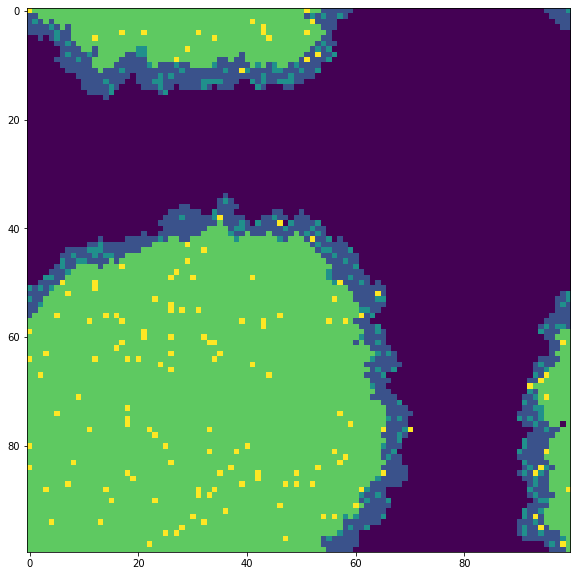

Tempo de simulação da rede: 2.814232349395752

Quantitativo de indivíduos no passo 170 :
  Sadios:  1
  Infectados (Tipo 1):  0
  Infectados (Tipo 2):  0
  Curados:  9673 ( 8045 / 1628 )
  Obitos:  326
Total:  10000 

******************************
******** MATRIZ FINAL ********
******************************
 [[4 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 3 3]
 ...
 [3 3 3 ... 3 3 3]
 [3 3 3 ... 3 4 3]
 [3 3 3 ... 3 3 3]]


In [605]:
num_passo = 0
df = pd.DataFrame(columns=[])
flag_chegou_metade = False
start = time()
while len(lista_infectado) > 0:
    realiza_movimento()
    num_passo = num_passo + 1
    atualiza_lapso_temporal_infectado()
    if num_passo >= lapso_temporal_cura:
        determina_cura()
    verifica_obito()
    if (qtde_infectado_1 + qtde_infectado_2 + qtde_curado + qtde_obito) >= qtde_sadio and not flag_chegou_metade:
        print('50% dos indivíduos infectados no passo:', num_passo)
        imprime_quantidades(num_passo)
        flag_chegou_metade = True
        fig, ax = plt.subplots(figsize=(10,10))
        mapa_de_cor = plt.cm.viridis
        ax.imshow(matriz, cmap=mapa_de_cor)
        plt.show()
    df[num_passo] = [qtde_sadio, qtde_infectado_1, qtde_infectado_2, qtde_curado, qtde_curado_1, qtde_curado_2, qtde_obito]
    
end = time()
print('Tempo de simulação da rede:', end - start)

if (qtde_sadio) == 0:
    print('\n100% dos indivíduos foram infectados no passo <<', num_passo, '>>')
imprime_quantidades(num_passo)
print('******************************')
print('******** MATRIZ FINAL ********')
print('******************************\n', matriz)

df = df.T
df.columns = ['sadio', 'infectado_1', 'infectado_2', 'curado', 'curado_1', 'curado_2', 'obito']

# Visualizando os resultados

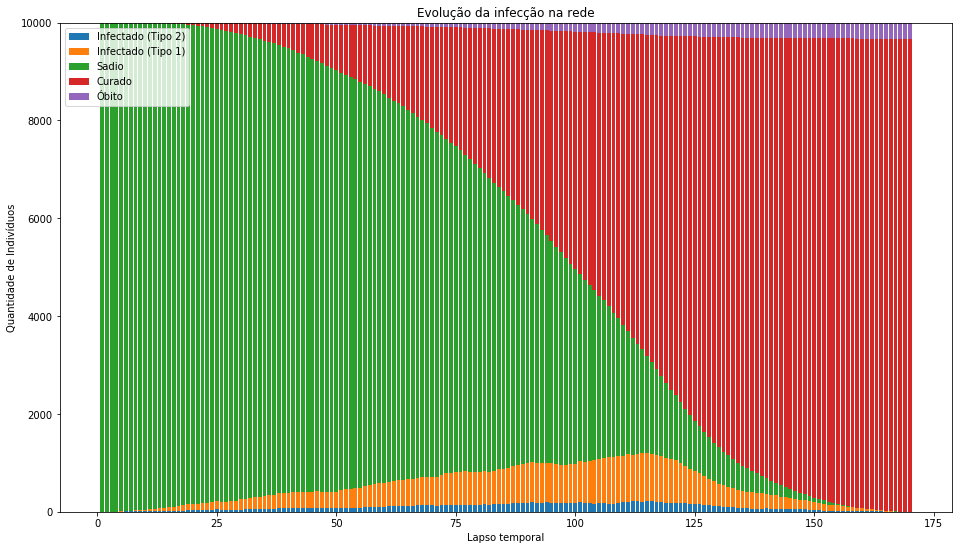

In [606]:
plt.figure(figsize=(16,9))
plt.bar(df.index, df['infectado_2'], label='Infectado (Tipo 2)')
plt.bar(df.index, df['infectado_1'], label='Infectado (Tipo 1)', bottom=df['infectado_2'])
plt.bar(df.index, df['sadio'], label='Sadio', bottom=df['infectado_1'] + df['infectado_2'])
plt.bar(df.index, df['curado'], label='Curado', bottom=df['infectado_1'] + df['infectado_2'] + df['sadio'])
plt.bar(df.index, df['obito'], label='Óbito', bottom=df['infectado_1'] + df['infectado_2'] + df['sadio'] + df['curado'])
plt.title('Evolução da infecção na rede')
plt.xlabel('Lapso temporal')
plt.ylabel('Quantidade de Indivíduos')
plt.legend()
plt.show()

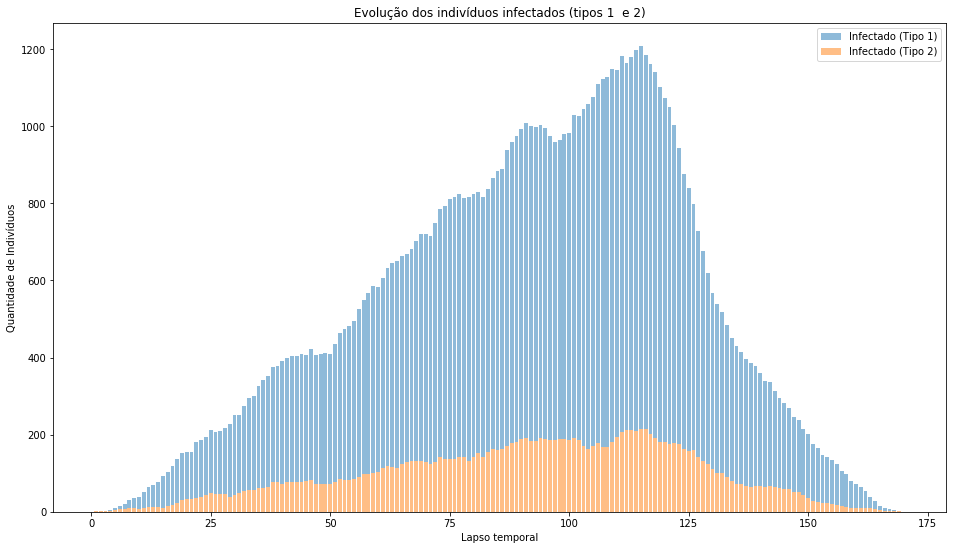

In [607]:
plt.figure(figsize=(16,9))
plt.bar(df.index, df['infectado_1'], alpha = 0.5, label='Infectado (Tipo 1)', bottom=df['infectado_2'])
plt.bar(df.index, df['infectado_2'], alpha = 0.5, label='Infectado (Tipo 2)')
plt.title('Evolução dos indivíduos infectados (tipos 1  e 2)')
plt.xlabel('Lapso temporal')
plt.ylabel('Quantidade de Indivíduos')
plt.legend()
plt.show()

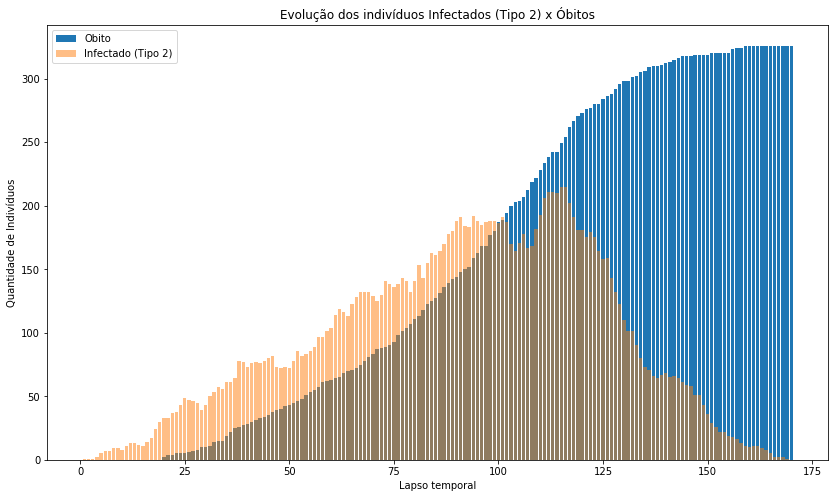

In [608]:
plt.figure(figsize=(14,8))
plt.bar(df.index, df['obito'], label='Obito')
plt.bar(df.index, df['infectado_2'], alpha = 0.5, label='Infectado (Tipo 2)')
plt.title('Evolução dos indivíduos Infectados (Tipo 2) x Óbitos')
plt.xlabel('Lapso temporal')
plt.ylabel('Quantidade de Indivíduos')
plt.legend()
plt.show()

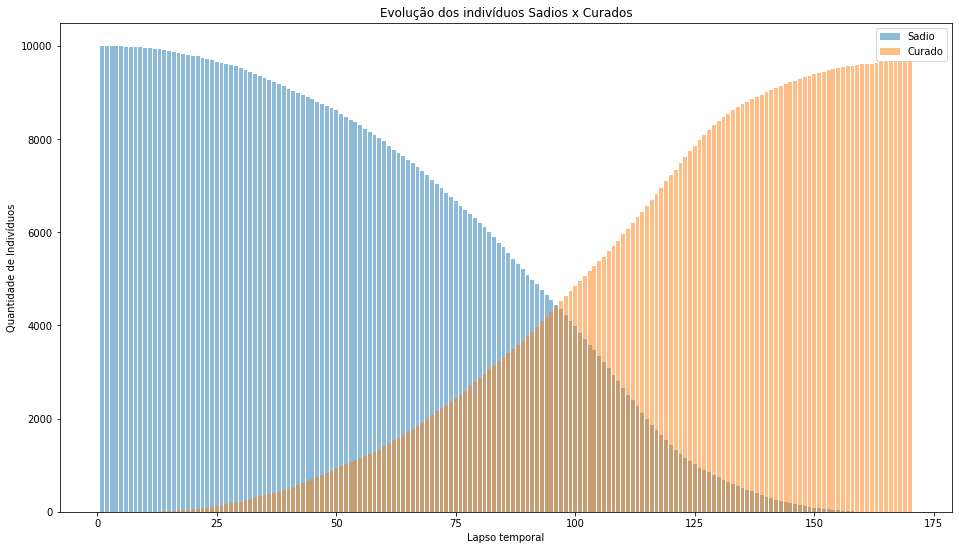

In [609]:
plt.figure(figsize=(16,9))
plt.bar(df.index, df['sadio'], alpha = 0.5, label='Sadio')
plt.bar(df.index, df['curado'], alpha = 0.5, label='Curado')
plt.title('Evolução dos indivíduos Sadios x Curados')
plt.xlabel('Lapso temporal')
plt.ylabel('Quantidade de Indivíduos')
plt.legend()
plt.show()

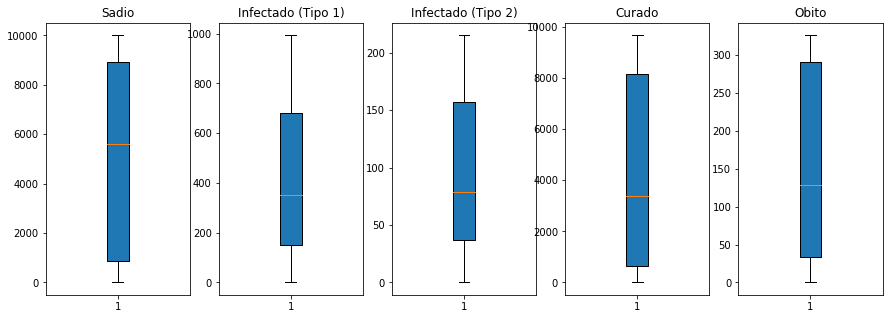

In [610]:
fig, axs = plt.subplots(1, 5, figsize=(15,5))

axs[0].boxplot(df['sadio'], patch_artist=True)
axs[0].set_title('Sadio')

axs[1].boxplot(df['infectado_1'], patch_artist=True)
axs[1].set_title('Infectado (Tipo 1)')

axs[2].boxplot(df['infectado_2'], patch_artist=True)
axs[2].set_title('Infectado (Tipo 2)')

axs[3].boxplot(df['curado'], patch_artist=True)
axs[3].set_title('Curado')

axs[4].boxplot(df['obito'], patch_artist=True)
axs[4].set_title('Obito')

plt.show()

# 9. Os valores gerados no item 8, para cada caso do item 4, devem analisados estatisticamente e:

9.1. Realize a estatística descritiva;

In [611]:
df

,sadio,infectado_1,infectado_2,curado,curado_1,curado_2,obito
1,9999,0,1,0,0,0,0
2,9999,0,1,0,0,0,0
3,9999,0,1,0,0,0,0
4,9995,3,2,0,0,0,0
5,9990,5,5,0,0,0,0
...,...,...,...,...,...,...,...
166,1,9,2,9662,8036,1626,326
167,1,4,2,9667,8041,1626,326
168,1,3,2,9668,8042,1626,326
169,1,1,1,9671,8044,1627,326


In [612]:
df.describe()

,sadio,infectado_1,infectado_2,curado,curado_1,curado_2,obito
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,5119.247059,425.911765,93.847059,4208.011765,3497.747059,710.264706,152.982353
std,3809.257485,309.332931,65.792215,3632.611048,3025.172621,607.481546,124.082883
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,861.000000,149.000000,37.250000,630.500000,518.500000,112.000000,33.250000
50%,5617.000000,350.500000,79.000000,3367.000000,2796.500000,570.500000,129.000000
75%,8930.000000,682.000000,157.250000,8159.500000,6803.750000,1355.750000,291.000000
max,9999.000000,993.000000,215.000000,9673.000000,8045.000000,1628.000000,326.000000


In [613]:
df.var()

sadio          1.451044e+07
infectado_1    9.568686e+04
infectado_2    4.328616e+03
curado         1.319586e+07
curado_1       9.151669e+06
curado_2       3.690338e+05
obito          1.539656e+04
dtype: float64

In [614]:
df.std()

sadio          3809.257485
infectado_1     309.332931
infectado_2      65.792215
curado         3632.611048
curado_1       3025.172621
curado_2        607.481546
obito           124.082883
dtype: float64

In [615]:
print(df.corr())

                sadio  infectado_1  infectado_2    curado  curado_1  curado_2  \
sadio        1.000000    -0.191061    -0.179503 -0.994976 -0.994953 -0.995024   
infectado_1 -0.191061     1.000000     0.989500  0.091867  0.091624  0.093071   
infectado_2 -0.179503     0.989500     1.000000  0.080857  0.080775  0.081258   
curado      -0.994976     0.091867     0.080857  1.000000  0.999998  0.999941   
curado_1    -0.994953     0.091624     0.080775  0.999998  1.000000  0.999915   
curado_2    -0.995024     0.093071     0.081258  0.999941  0.999915  1.000000   
obito       -0.999205     0.158353     0.146458  0.997500  0.997490  0.997475   

                obito  
sadio       -0.999205  
infectado_1  0.158353  
infectado_2  0.146458  
curado       0.997500  
curado_1     0.997490  
curado_2     0.997475  
obito        1.000000  


In [616]:
print(df.cov())

                    sadio    infectado_1   infectado_2        curado  \
sadio        1.451044e+07 -225132.575705 -44986.849565 -1.376804e+07   
infectado_1 -2.251326e+05   95686.861991  20138.010094  1.032297e+05   
infectado_2 -4.498685e+04   20138.010094   4328.615524  1.932459e+04   
curado      -1.376804e+07  103229.657849  19324.587609  1.319586e+07   
curado_1    -1.146550e+07   85740.391751  16076.884163  1.098925e+07   
curado_2    -2.302538e+06   17489.266098   3247.703446  2.206614e+06   
obito       -4.722881e+05    6078.045771   1195.636338  4.496178e+05   

                 curado_1      curado_2          obito  
sadio       -1.146550e+07 -2.302538e+06 -472288.066620  
infectado_1  8.574039e+04  1.748927e+04    6078.045771  
infectado_2  1.607688e+04  3.247703e+03    1195.636338  
curado       1.098925e+07  2.206614e+06  449617.822694  
curado_1     9.151669e+06  1.837580e+06  374430.125687  
curado_2     1.837580e+06  3.690338e+05   75187.697007  
obito        3.744301e+0

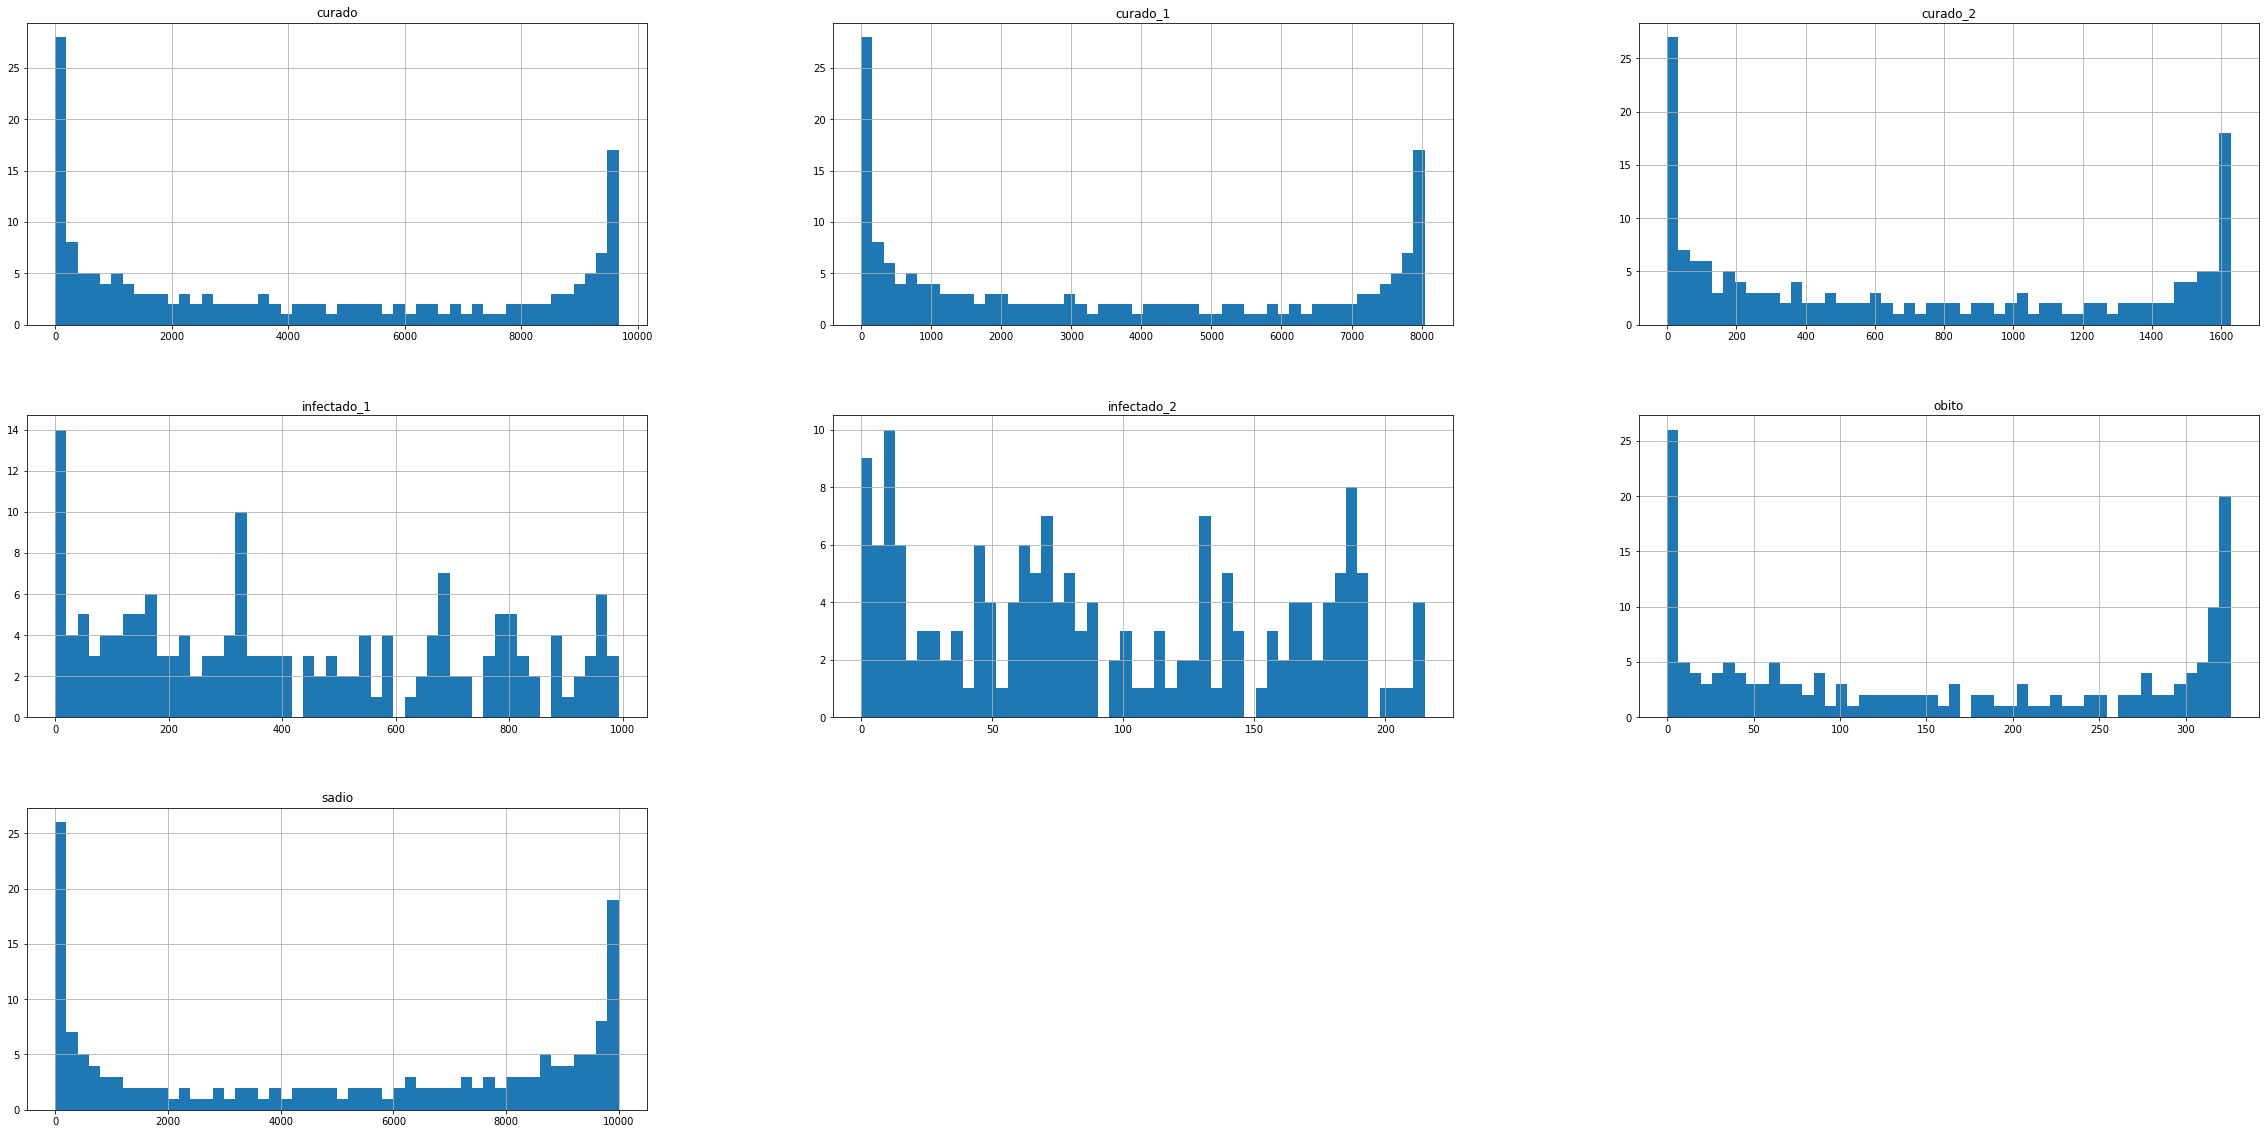

In [617]:
g=df.hist(bins=50, figsize=(40,20)) # Histograms

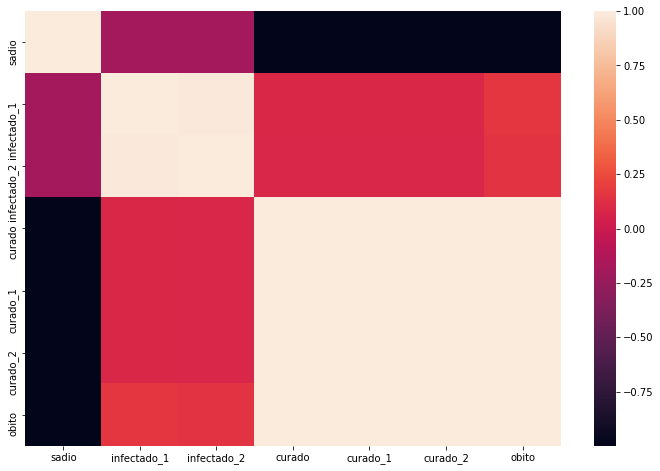

In [618]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

9.2. Verificar se o experimento se ajusta a uma distribuição normal.

9.2.1 - Analise Gráfica

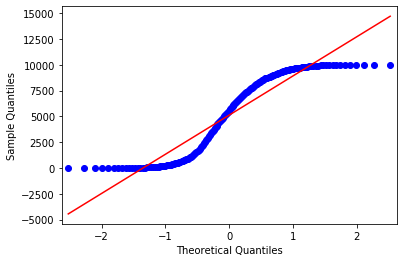

In [619]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['sadio']), line='s')
pyplot.show()


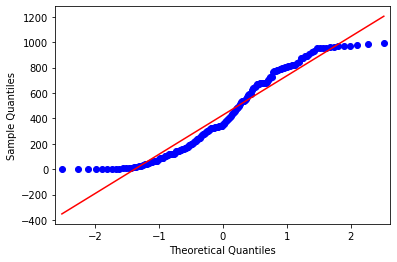

In [620]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['infectado_1']), line='s')
pyplot.show()

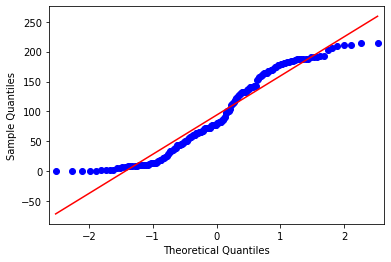

In [621]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['infectado_2']), line='s')
pyplot.show()


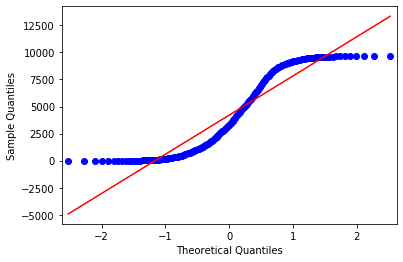

In [622]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['curado']), line='s')
pyplot.show()

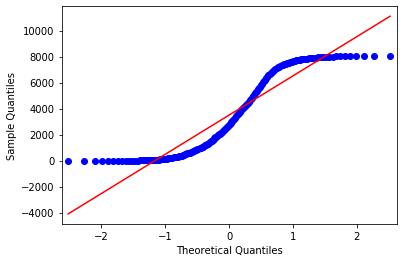

In [623]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['curado_1']), line='s')
pyplot.show()

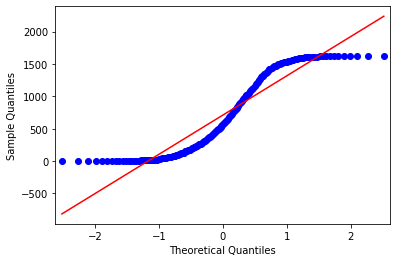

In [624]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['curado_2']), line='s')
pyplot.show()

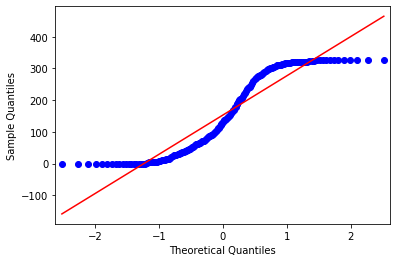

In [625]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot((df['obito']), line='s')
pyplot.show()


9.2.2 - Teste de Shapiro Wilk

Definindo a significância do teste ($\alpha$)

In [626]:
significancia = 0.05 

O teste de *Shapiro* verifica a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal.

<font color='red'>Critério do valor $p$</font>

> Rejeitar $H_0$ se o valor $p\leq 0,05$

Verificando se o experimento se ajusta a uma distribuição normal para os sadios

In [627]:
df['sadio']

1      9999
2      9999
3      9999
4      9995
5      9990
       ... 
166       1
167       1
168       1
169       1
170       1
Name: sadio, Length: 170, dtype: int64

In [628]:
stat_test, p_valor = shapiro(df['sadio'])
print('Valor da estatística:', stat_test)
print('Valor de p:', '%f' % p_valor)

if p_valor <= significancia:
    print('A hipótese H0 deve ser rejeitada para os "sadios".')
else:
    print('Não é possível rejeitar a hipótese H0 para os "sadios".')


Valor da estatística: 0.8637535572052002
Valor de p: 0.000000
A hipótese H0 deve ser rejeitada para os "sadios".


Verificando se o experimento se ajusta a uma distribuição normal para os Infectados Tipo 1

In [629]:
stat_test, p_valor = shapiro(df['infectado_1'])
print('Valor da estatística:', stat_test)
print('Valor de p:', '%f' % p_valor)

if p_valor <= significancia:
    print('A hipótese H0 deve ser rejeitada para os "Infectados (Tipo 1)".')
else:
    print('Não é possível rejeitar a hipótese H0 para os "Infectados (Tipo 1)".')


Valor da estatística: 0.9293953776359558
Valor de p: 0.000000
A hipótese H0 deve ser rejeitada para os "Infectados (Tipo 1)".


Verificando se o experimento se ajusta a uma distribuição normal para os Infectados Tipo 2

In [630]:
df['infectado_2']

1      1
2      1
3      1
4      2
5      5
      ..
166    2
167    2
168    2
169    1
170    0
Name: infectado_2, Length: 170, dtype: int64

In [631]:
stat_test, p_valor = shapiro(df['infectado_2'])
print('Valor da estatística:', stat_test)
print('Valor de p:', '%f' % p_valor)

if p_valor <= significancia:
    print('A hipótese H0 deve ser rejeitada para os "Infectados (Tipo 2)".')
else:
    print('Não é possível rejeitar a hipótese H0 para os "Infectados (Tipo 2)".')


Valor da estatística: 0.9296845197677612
Valor de p: 0.000000
A hipótese H0 deve ser rejeitada para os "Infectados (Tipo 2)".


Verificando se o experimento se ajusta a uma distribuição normal para os curados

In [632]:
stat_test, p_valor = shapiro(df['curado'])
print('Valor da estatística:', stat_test)
print('Valor de p:', '%f' % p_valor)

if p_valor <= significancia:
    print('A hipótese H0 deve ser rejeitada para os "curados".')
else:
    print('Não é possível rejeitar a hipótese H0 para os "curados".')

Valor da estatística: 0.8615397214889526
Valor de p: 0.000000
A hipótese H0 deve ser rejeitada para os "curados".


Verificando se o experimento se ajusta a uma distribuição normal para os mortos

In [633]:
stat_test, p_valor = shapiro(df['obito'])
print('Valor da estatística:', stat_test)
print('Valor de p:', '%f' % p_valor)

if p_valor <= significancia:
    print('A hipótese H0 deve ser rejeitada para os "mortos".')
else:
    print('Não é possível rejeitar a hipótese H0 para os "mortos".')

Valor da estatística: 0.8628259301185608
Valor de p: 0.000000
A hipótese H0 deve ser rejeitada para os "mortos".


9.2.3 - Teste de Kolmogorov-Smirnov

In [634]:
from scipy.stats import kstest
import numpy as np

a = df["sadio"]
test_stat_a = kstest(a, 'norm')
b = df["infectado_1"]
test_stat_b = kstest(b, 'norm')
c = df["infectado_2"]
test_stat_c = kstest(c, 'norm')
d = df["curado"]
test_stat_d = kstest(d, 'norm')
e = df["obito"]
test_stat_e = kstest(e, 'norm')
print(test_stat_a)
print(test_stat_b)
print(test_stat_c)
print(test_stat_d)
print(test_stat_e)

# Se a estatística K-S é pequena ou o valor p é alto, então não podemos rejeitar a hipótese 
# de que as distribuições das duas amostras são as mesmas.
# Não é possível rejeitar, não significa que confirmamos.

KstestResult(statistic=0.9398265725566052, pvalue=6.307683049218565e-208)
KstestResult(statistic=0.9692383372624875, pvalue=1.8310368198644203e-257)
KstestResult(statistic=0.9478381033459384, pvalue=1.782813246143953e-218)
KstestResult(statistic=0.9294114780543105, pvalue=3.85677524329398e-196)
KstestResult(statistic=0.8823212699346374, pvalue=2.582850766232783e-158)


9.3. Verifique com quantos passos sua rede atinge 100% de infectados:        

In [635]:
if (qtde_sadio) == 0:
    print('\n100% dos indivíduos foram infectados no passo <<', num_passo, '>>')

9.3.1. Com base nestes dados, verifique com 95% de confiança, qual o número de cada indivíduo no passo n/2+1;

In [636]:
passo_n_2 = len(df)//2+1
print('Total de Passos:                   :', len(df))
print('Numero de indivíduos no passo n/2+1 :', passo_n_2)
df_passo = df.iloc[0:passo_n_2]

media = df_passo['sadio'].mean(axis=0)                                                                                      
desvio_padrao = np.std(df_passo['sadio'])                                          
conf_int_s = stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
#print(desvio_padrao/media*100)
#print(media)

media = df_passo['infectado_1'].mean(axis=0)                                                                                      
desvio_padrao = np.std(df_passo['infectado_1'])                                          
conf_int_i1 = stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
#print(desvio_padrao/media*100)
#print(media)

media = df_passo['infectado_2'].mean(axis=0)                                                                                      
desvio_padrao = np.std(df_passo['infectado_2'])                                          
conf_int_i2 = stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
#print('inf2',desvio_padrao)
#print(media)

media = df_passo['curado'].mean(axis=0)                                                                                      
desvio_padrao = np.std(df_passo['curado'])                                          
conf_int_c = stats.norm.interval(0.95, loc=media, scale=desvio_padrao) 
#print(desvio_padrao/media*100)
#print(media)

media = df_passo['obito'].mean(axis=0)                                                                                      
desvio_padrao = np.std(df_passo['obito'])                                          
conf_int_o = stats.norm.interval(0.95, loc=media, scale=desvio_padrao)
#print(desvio_padrao/media*100)
#print(media)

print('******************** INTERVALO DE CONFIANÇA ********************')
print('Indivíduos Sadios:             ', conf_int_s)
print('Indivíduos Infectados (Tipo 1):', conf_int_i1)
print('Indivíduos Infectados (Tipo 2):', conf_int_i2)
print('Indivíduos Curados:            ', conf_int_c)
print('Indivíduos Mortos:             ', conf_int_o)


Total de Passos:                   : 170
Numero de indivíduos no passo n/2+1 : 86
******************** INTERVALO DE CONFIANÇA ********************
Indivíduos Sadios:              (5940.025534894132, 11152.230279059357)
Indivíduos Infectados (Tipo 1): (-108.20700519905523, 782.9977028734738)
Indivíduos Infectados (Tipo 2): (-19.540988785613678, 170.2851748321253)
Indivíduos Curados:             (-1007.6145681677971, 3005.963405377099)
Indivíduos Mortos:              (-35.780915783658045, 119.64138089993712)


In [637]:
#Vericar se os dados estão dentro do intervalo
df.iloc[passo_n_2]

sadio          5432
infectado_1     769
infectado_2     170
curado         3493
curado_1       2901
curado_2        592
obito           136
Name: 87, dtype: int64

9.3.2. Verifique a independência das contaminações entre assintomáticos e sintomáticos através de CHI-Square, com base na seguinte relação: são esperados 18% de doentes e 80% de assintomáticos e 2% de mortos;

### Verificação da independência das contaminações
O teste do $\chi^2$ testa a hipótese nula de não haver diferença entre as frequências observadas de um determinado evento e as frequências que são realmente esperadas para este evento.

<font color='red'>Critério do valor $p$</font>

> ##### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [638]:
doente = df['infectado_2'].iloc[passo_n_2-1] + df['curado_2'].iloc[passo_n_2-1]
assintomatico = df['infectado_1'].iloc[passo_n_2-1] + df['curado_1'].iloc[passo_n_2-1]
morto = df['obito'].iloc[passo_n_2-1]

F_Observada = [doente/(doente + assintomatico + morto),  assintomatico/(doente + assintomatico + morto), 
               morto/(doente + assintomatico + morto)]
F_Esperada = [0.18, 0.8, 0.02]

chi_2, p_valor = chisquare(f_obs=F_Observada, f_exp=F_Esperada)

print('Valor da estatística:', chi_2)
print('Valor de p:', p_valor)

if p_valor <= significancia:
    print('Com um nível de confiança de 95%, rejeitamos a hipótese nula (H0) e concluímos que as frequências observadas e esperadas são discrepantes.')
else:
    print('Com um nível de confiança de 95%, concluímos não ser possível rejeitar a hipótese H0.')

Valor da estatística: 0.005387799070707504
Valor de p: 0.9973097257558787
Com um nível de confiança de 95%, concluímos não ser possível rejeitar a hipótese H0.
